In [1]:
import numpy as np

# Define the model mapping
groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}

activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}
reverse_activity_labels = {v: k for k, v in activity_labels.items()}

print("Activity Labels Dictionary: ", reverse_activity_labels)

# Load datasets
X_train = np.load('../FinalDataset/X_train.npy')
X_test = np.load('../FinalDataset/X_test.npy')
y_train = np.load('../FinalDataset/y_train.npy')
y_test = np.load('../FinalDataset/y_test.npy')

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)



Activity Labels Dictionary:  {'WALKING': 1, 'WALKING_UPSTAIRS': 2, 'WALKING_DOWNSTAIRS': 3, 'SITTING': 4, 'STANDING': 5, 'LAYING': 6}
X_train shape:  (126, 500, 3)
X_test shape:  (54, 500, 3)
y_train shape:  (126,)
y_test shape:  (54,)


In [5]:
with np.load('processed_data.npz') as data:
    X_train_pca_20 = data['X_train_pca_20']
    X_test_pca_20 = data['X_test_pca_20']
    y_train = data['y_train']
    y_test = data['y_test']

print(X_train_pca_20.shape)
print(X_test_pca_20.shape)

(126, 20)
(54, 20)


In [ ]:
# import time
# from langchain_groq import ChatGroq
# from sklearn.metrics import accuracy_score, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# def make_api_call(prompt):
#     while True:
#         try:
#             response = llm.invoke(prompt)
#             return response
#         except Exception as e:
#             print(f"Rate limit error: {e}. Retrying in 10 seconds...")
#             time.sleep(10)  # Wait before retrying

# # Set up your Groq API credentials and model
# Groq_Token = "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"
# model_name = "llama3.1-70b"
# llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)

# # Function to generate a zero-shot prompt
# # Function to generate a zero-shot prompt
# def create_zero_shot_prompt(query_input, retained_features):
#     """Generate a prompt for the model given the JSON formatted data and retained features."""
#     # Combine features and their corresponding values in "column:value" format
#     features_str = ', '.join([f"{feature}:{value}" for feature, value in zip(retained_features, query_input)])

#     description = (f"""
#     You are a highly trained human activity classification model.
#     Each input is a vector containing numerical values that represent specific features of human activity data.
#     The data is presented as pairs of column names and their corresponding values.

#     The data consists of {N} features extracted from the Human Activity Recognition dataset. 
#     Your task is to analyze the given input vector and classify the human activity into one of the following categories:
#     - 1: WALKING
#     - 2: WALKING_UPSTAIRS
#     - 3: WALKING_DOWNSTAIRS
#     - 4: SITTING 
#     - 5: STANDING
#     - 6: LAYING

#     The initial data consisted of:
#     - 500 readings, each containing three accelerometer values: (acceleration_x, acceleration_y, acceleration_z).
#     - The data is collected over a 10-second period at a sampling rate of 50 Hz, which gives 500 readings.

#     Data Format:
#     - Static activities tend to have very little variation in the accelerometer data, while dynamic activities tend to have more variation.
#     - x axis is the vertical axis, z axis is forward direction, and y axis is the side direction.
#     - Acceleration is measured in terms of g-force. At rest, the acceleration is 1 (representing gravity).

#     The following input vector represents the selected features and their corresponding values: {features_str}

#     Now, classify this input vector into one of the numerical categories (1, 2, 3, 4, 5, 6) and return ONLY the number.
#     """)

#     return description

# N = 6
# # Step 3: Select 3 samples from each activity
# selected_indices = []
# samples_per_activity = 4
# activity_count = {i: 0 for i in range(1, 7)}  # Dictionary to track count of selected samples for each activity

# for i, label in enumerate(y_test):
#     if activity_count[label] < samples_per_activity:
#         selected_indices.append(i)
#         activity_count[label] += 1
#     if all(count == samples_per_activity for count in activity_count.values()):
#         break

# # Store predictions and true labels
# predictions = []
# true_labels = []

# # Step 4: Test the selected cases
# for idx in selected_indices:
#     query_input = X_test_important[idx].tolist()
#     true_label = y_test[idx]
#     prompt = create_zero_shot_prompt(query_input, top_feature_names)
    
#     # Step 5: Make the API call using ChatGroq
#     answer = make_api_call(prompt)
    
#     # Store predictions and true labels
#     predicted_label = int(answer.content.strip())
    
#     predictions.append(predicted_label)
#     true_labels.append(true_label)
    
#     # Print the predicted and true labels
#     print(f"Test Case {idx + 1} ({activity_labels[true_label]}):")
#     print(f"Predicted label for the query input: {predicted_label}")
#     print(f"True label for the query input: {true_label}")
#     print("-" * 50)

# # Calculate accuracy
# accuracy = accuracy_score(true_labels, predictions)
# print(f"Accuracy: {accuracy:.2f}")

# # Calculate confusion matrix
# conf_matrix = confusion_matrix(true_labels, predictions, labels=[1, 2, 3, 4, 5, 6])

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'], 
#             yticklabels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()



Test Case 1 (WALKING_DOWNSTAIRS):
Predicted label for the query input: 2
True label for the query input: 3
--------------------------------------------------
Test Case 2 (WALKING):
Predicted label for the query input: 2
True label for the query input: 1
--------------------------------------------------
Test Case 3 (WALKING_UPSTAIRS):
Predicted label for the query input: 4
True label for the query input: 2
--------------------------------------------------
Test Case 4 (STANDING):
Predicted label for the query input: 4
True label for the query input: 5
--------------------------------------------------
Test Case 5 (STANDING):
Predicted label for the query input: 4
True label for the query input: 5
--------------------------------------------------
Test Case 6 (WALKING):
Predicted label for the query input: 4
True label for the query input: 1
--------------------------------------------------
Test Case 7 (WALKING):
Predicted label for the query input: 2
True label for the query input: 1


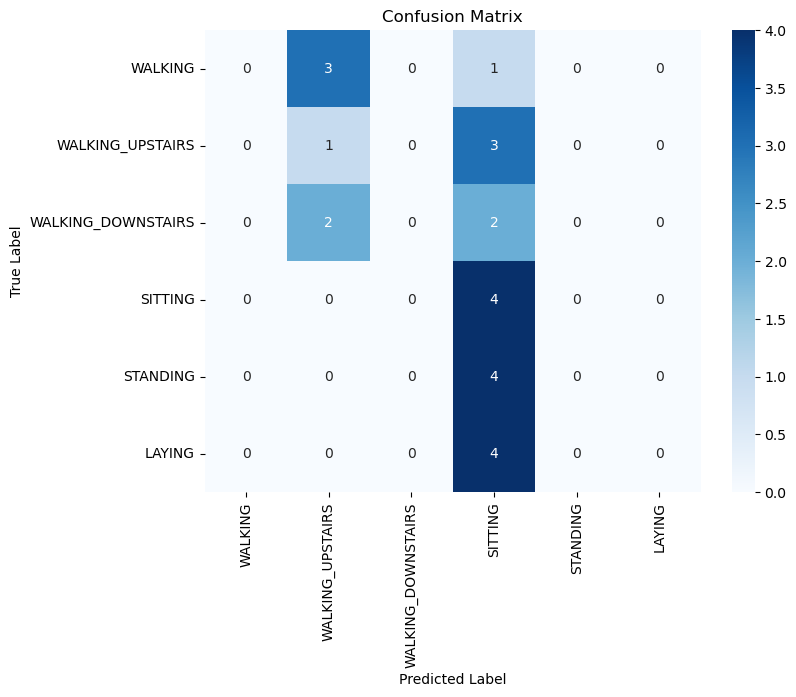

In [9]:
import time
from langchain_groq import ChatGroq
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def make_api_call(prompt):
    while True:
        try:
            response = llm.invoke(prompt)
            return response
        except Exception as e:
            print(f"Rate limit error: {e}. Retrying in 10 seconds...")
            time.sleep(10)  # Wait before retrying

# Set up your Groq API credentials and model
Groq_Token = "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"

model_name = "llama3.1-70b"
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)

# Function to generate a zero-shot prompt
def create_zero_shot_prompt(query_input):
    """Generate a prompt for the model given the input array."""
    # Combine features and their corresponding values in "index:value" format
    features_str = ', '.join([f"{i}:{value}" for i, value in enumerate(query_input)])

    description = (f"""
    You are a highly trained human activity classification model.
    Each input is a vector containing numerical values that represent specific features of human activity data.
    The data is presented as pairs of indices and their corresponding values.

    The data consists of 20 principal components extracted from the Human Activity Recognition dataset. 
    Your task is to analyze the given input vector and classify the human activity into one of the following categories:
    - 1: WALKING
    - 2: WALKING_UPSTAIRS
    - 3: WALKING_DOWNSTAIRS
    - 4: SITTING 
    - 5: STANDING
    - 6: LAYING

    The following input vector represents the selected features and their corresponding values: {features_str}

    Now, classify this input vector into one of the numerical categories (1, 2, 3, 4, 5, 6) and return ONLY the number.
    """)

    return description

# Step 3: Select 4 samples from each activity
selected_indices = []
samples_per_activity = 4
activity_count = {i: 0 for i in range(1, 7)}  # Dictionary to track count of selected samples for each activity

for i, label in enumerate(y_test):
    if activity_count[label] < samples_per_activity:
        selected_indices.append(i)
        activity_count[label] += 1
    if all(count == samples_per_activity for count in activity_count.values()):
        break

# Store predictions and true labels
predictions = []
true_labels = []

# Step 4: Test the selected cases
for idx in selected_indices:
    query_input = X_test_pca_20[idx].tolist()
    true_label = y_test[idx]
    prompt = create_zero_shot_prompt(query_input)
    
    # Step 5: Make the API call using ChatGroq
    answer = make_api_call(prompt)
    
    # Store predictions and true labels
    predicted_label = int(answer.content.strip())
    
    predictions.append(predicted_label)
    true_labels.append(true_label)
    
    # Print the predicted and true labels
    print(f"Test Case {idx + 1} ({activity_labels[true_label]}):")
    print(f"Predicted label for the query input: {predicted_label}")
    print(f"True label for the query input: {true_label}")
    print("-" * 50)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, labels=[1, 2, 3, 4, 5, 6])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'], 
            yticklabels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
